In [1]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import cluster

#https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [2]:
#The question we want to look into is:
#Do some parts of Vancouver have more cafes than others? 
#and If so, is it due to restaurant locations? - In other words are cafe locations influenced by restaurant locations? 
#Get the data 
data = pd.read_json('amenities-vancouver.json.gz', lines=True)
data

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
2,49.373423,-123.291894,2016-10-10T02:14:29.000-07:00,toilets,NaN,{}
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{}
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W..."
...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{}
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne..."


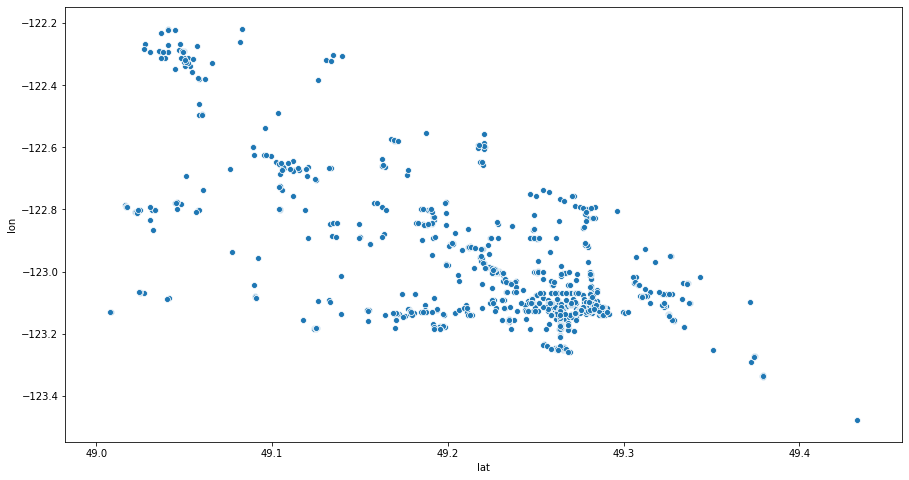

In [3]:
#extract only cafes 

def amenities_c(str):
    if str in ['cafe']:
        return 'cafe'
    return None

#store in a new column and apply the function 
data['CAFE'] = data['amenity'].apply(amenities_c)
data_c = data[data['CAFE'].notna()]
data_c

#lets visualize the points on a scatterplot 
plt.figure(figsize = (15,8))
sb.scatterplot(data_c['lat'], data_c['lon'])


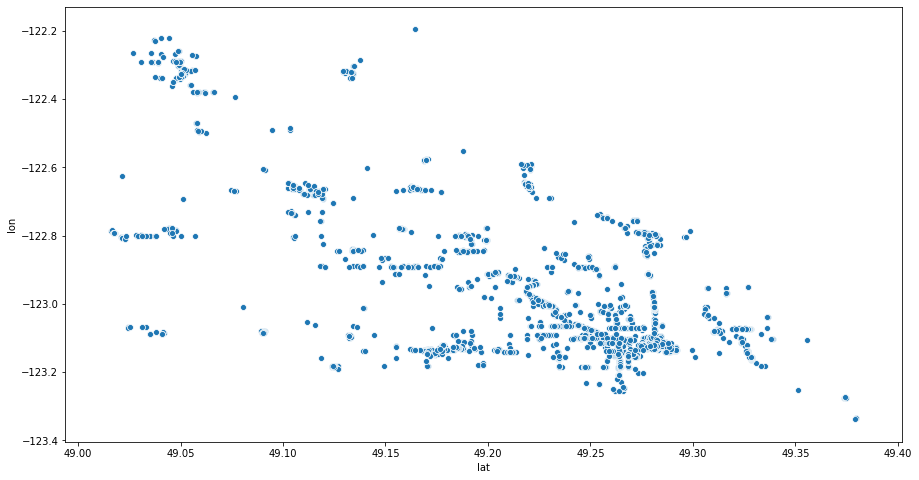

In [4]:
#now lets extract restaurants 

def amenities_r(str):
    if str in ['restaurant']:
        return 'restaurant'
    return None

#store in a new column and apply the function 
data['RESTAURANT'] = data['amenity'].apply(amenities_r)
data_r = data[data['RESTAURANT'].notna()]
data_r

#lets visualize the points on a scatterplot 
plt.figure(figsize = (15,8))
sb.scatterplot(data_r['lat'], data_r['lon'])

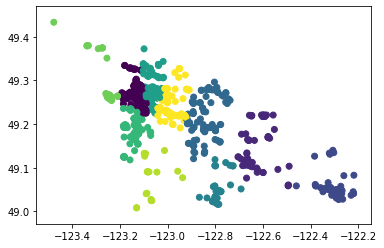

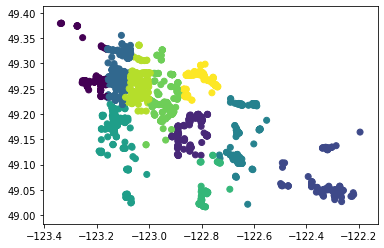

In [5]:
#A cluster refers to a collection of data points aggregated together because of certain similarities.

#Cafe

# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(data_c[['lon', 'lat']])
labels = kmeans.labels_
plt.scatter(data_c['lon'], data_c['lat'], c=labels)
plt.show()


#Restaurant 
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(data_r[['lon', 'lat']])
labels1 = kmeans.labels_
plt.scatter(data_r['lon'], data_r['lat'], c=labels1)
plt.show()

In [10]:
#now the data is ready, we can plot the distribution for cafes 
#first get the map of vancouver, accroding to google the long and lat values are 
#The latitude of Vancouver, BC, Canada is 49.246292, and the longitude is -123.116226.

vancouver_lat = 49.246292 
vancouver_long = -123.116226

vancouver_map_c = folium.Map(location=[vancouver_lat, vancouver_long], zoom_start=10)
#vancouver_map

#lets add the points on the map 
#adapted from https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython

def plotDot(point):
    folium.CircleMarker(location=[point.lat, point.lon],
                        radius=0.2,
                        weight=5).add_to(vancouver_map_c)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data_c.apply(plotDot, axis = 1)

#vancouver_map_p

fig = vancouver_map_c
fig

#looking at the output, it looks like more cafes are concentrated more in downtown vancouver area (close to english bay and coal harbour area)

In [11]:
#now the data is ready, we can plot the distribution for restaurants 
#first get the map of vancouver, accroding to google the long and lat values are 
#The latitude of Vancouver, BC, Canada is 49.246292, and the longitude is -123.116226.

vancouver_lat = 49.246292 
vancouver_long = -123.116226

vancouver_map_r = folium.Map(location=[vancouver_lat, vancouver_long], zoom_start=10)
#vancouver_map

#lets add the points on the map 
#adapted from https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython

def plotDot(point):
    folium.CircleMarker(location=[point.lat, point.lon],
                        radius=0.2,
                        weight=5).add_to(vancouver_map_r)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data_r.apply(plotDot, axis = 1)

#vancouver_map_p

fig1 = vancouver_map_r
fig1

#looking at the output, it looks like more cafes are concentrated more in downtown vancouver area (close to english bay and coal harbour area)

In [13]:
#Now that we have visualized the distribution 
#we will use cluster to see the distribution pattern of both the cafes and restaurants 
#guiance from https://deparkes.co.uk/2016/06/24/folium-marker-clusters/

#Cafe

def draw_cluster(c, cluster):
    folium.Marker(
        location=[c['lat'], c['lon']]
    ).add_to(cluster)

cluster_cafe_map = folium.Map(location=[vancouver_lat, vancouver_long], zoom_start=10)


cafe_cluster = plugins.MarkerCluster().add_to(cluster_cafe_map)

data_c.apply(draw_cluster, axis=1, cluster=cafe_cluster)
fig_c = cluster_cafe_map.add_child(cafe_cluster)
fig_c





In [14]:
#Restaurant


cluster_res_map = folium.Map(location=[vancouver_lat, vancouver_long], zoom_start=10)


res_cluster = plugins.MarkerCluster().add_to(cluster_res_map)

data_r.apply(draw_cluster, axis=1, cluster=res_cluster)
fig_r = cluster_res_map.add_child(res_cluster)
fig_r

In [9]:
#lastly we will do some statistical analysis too see if cafe and restaurant mean and std lon and lat are different 

#cafe 
print(data_c[['lat', 'lon']].mean())
print(data_c[['lat', 'lon']].std())

#Restaurant 
print(data_r[['lat', 'lon']].mean())
print(data_r[['lat', 'lon']].std())



lat     49.229386
lon   -123.001527
dtype: float64
lat    0.076407
lon    0.217547
dtype: float64
lat     49.220426
lon   -122.981881
dtype: float64
lat    0.074321
lon    0.215242
dtype: float64
